# CART Decision Tree

Decision trees are one of the most intuitive and popular methods in data mining, especially as they provide explicit rules and cope well with heterogeneous, missing data and non-linear effects between explanatory and explanatory variables. They can be used for regression (regression trees) or classification (classification or segmentation trees).


Ranking: trees are used to detect criteria for dividing individuals in a population into k predefined classes. Here we have k=2 and two classes A and B to characterize. The principle of trees differs from that of logistic regression, SVM or linear discriminant analysis, where the aim is to find a linear function $f(x)ax+b$ with $f(x)>0$ and if $x \in A$ and $f(x) \le 0$  if and only if $ x \in B$

In a decision tree, the boundary between observations 1 and B is not sought in the form of a hyperplane $ f(x)=0 $

but in the form of perpendicular segments defining nested rectangles.

The first step is to find a segmentation of the population into 2 rectangles that are as differentiated as possible from the point of view of the class to be explained. We then need to find the variable X that defines these two rectangles, i.e. find X and a condition of the form :

- $X < x$ is quantitative
- $ X \in \{X_{i1}, ..., X_{ij}\} $ if X est qualitative with for modalities $ X_1, ..., X_k, k \ge j, and \{X_{i1}, ..., X_{ij}\} \subset \{X_1, ..., X_k\} $

Each rectangle is called a “node”, and is in turn split into two nodes, and so on until a stopping condition is met. The result is a nest of rectangles defining a partition of the population. Elementary rectangles are called “leaves”. Within a rectangle defined by one variable, two new rectangles can be defined, either by the same variable or by another, as shown in the graph below.
This example shows that the unpaid rates are quite distinct from one rectangle to another, varying between 0.150 and 0.672, which is what we're looking for.

In [1]:
import pandas as pd

credit2 = pd.read_csv('credit2.csv') 

pd.set_option('display.max_columns', None)  # Ajout pour afficher toutes les colonnes

test_size = 0.3

shuffled_data = credit2.sample(frac=1, random_state=42)

split_point = int(len(shuffled_data) * (1 - test_size))

train = shuffled_data.iloc[:split_point].reset_index().rename(columns={'index': 'id'})
test = shuffled_data.iloc[split_point:].reset_index().rename(columns={'index': 'id'})

In [2]:
train

,id,accounts,history_credit,object_credit,savings,employment_old,effort_rate,family_status,guarantees,home_old,property,other_credits,home_status,nb_credits,job_type,nb_of_dependants,telephone,age,duration_credit,amount_credit,presence_unpaid
0,521,CC < 0 euros,A32,Video-HIFI,< 500 euros,between 1 and 4 years,2,Female divorced/separated/married,Without guarantor,2,Property,No external credit,owner,1,A173,1,A191,"[0.0, 25.0)","[15.0, 36.0)","[0.0, 4000.0)",1
1,737,CC < 0 euros,A32,New car,< 500 euros,between 1 and 4 years,3,Male single/married/widowed,Without guarantor,4,Non-property,No external credit,owner,1,A172,2,A192,"[25.0, inf)","[15.0, 36.0)","[4000.0, inf)",0
2,740,CC < 0 euros,A31,New car,< 500 euros,for at least 4 years,2,Male single/married/widowed,Without guarantor,3,Non-property,External credits,owner,1,A173,1,A191,"[25.0, inf)","[15.0, 36.0)","[0.0, 4000.0)",0
3,660,CC > 200 euros,A32,Video-HIFI,< 500 euros,between 1 and 4 years,3,Male single/married/widowed,Without guarantor,4,Property,No external credit,Not owner,1,A173,1,A191,"[0.0, 25.0)","[0.0, 15.0)","[0.0, 4000.0)",0
4,411,No account,A34,Used car,< 500 euros,for at least 4 years,3,Male single/married/widowed,Without guarantor,2,Non-property,No external credit,owner,2,A174,1,A192,"[25.0, inf)","[15.0, 36.0)","[4000.0, inf)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,262,CC < 0 euros,A34,New car,< 500 euros,for at least 4 years,2,Male single/married/widowed,Without guarantor,4,No property,No external credit,Not owner,3,A174,1,A192,"[25.0, inf)","[15.0, 36.0)","[4000.0, inf)",0
696,610,CC < 0 euros,A32,Interior,< 500 euros,Unemployed or < 1 year,4,Female divorced/separated/married,Without guarantor,3,Not real estate,No external credit,owner,1,A173,1,A191,"[0.0, 25.0)","[0.0, 15.0)","[0.0, 4000.0)",1
697,297,No account,A32,New car,No savings,for at least 4 years,4,Male single/married/widowed,Without guarantor,2,Not real estate,No external credit,owner,1,A172,1,A191,"[25.0, inf)","[0.0, 15.0)","[0.0, 4000.0)",0
698,414,CC < 0 euros,A32,New car,No savings,between 1 and 4 years,4,Female divorced/separated/married,Without guarantor,2,Not real estate,No external credit,owner,1,A173,1,A191,"[25.0, inf)","[15.0, 36.0)","[0.0, 4000.0)",1


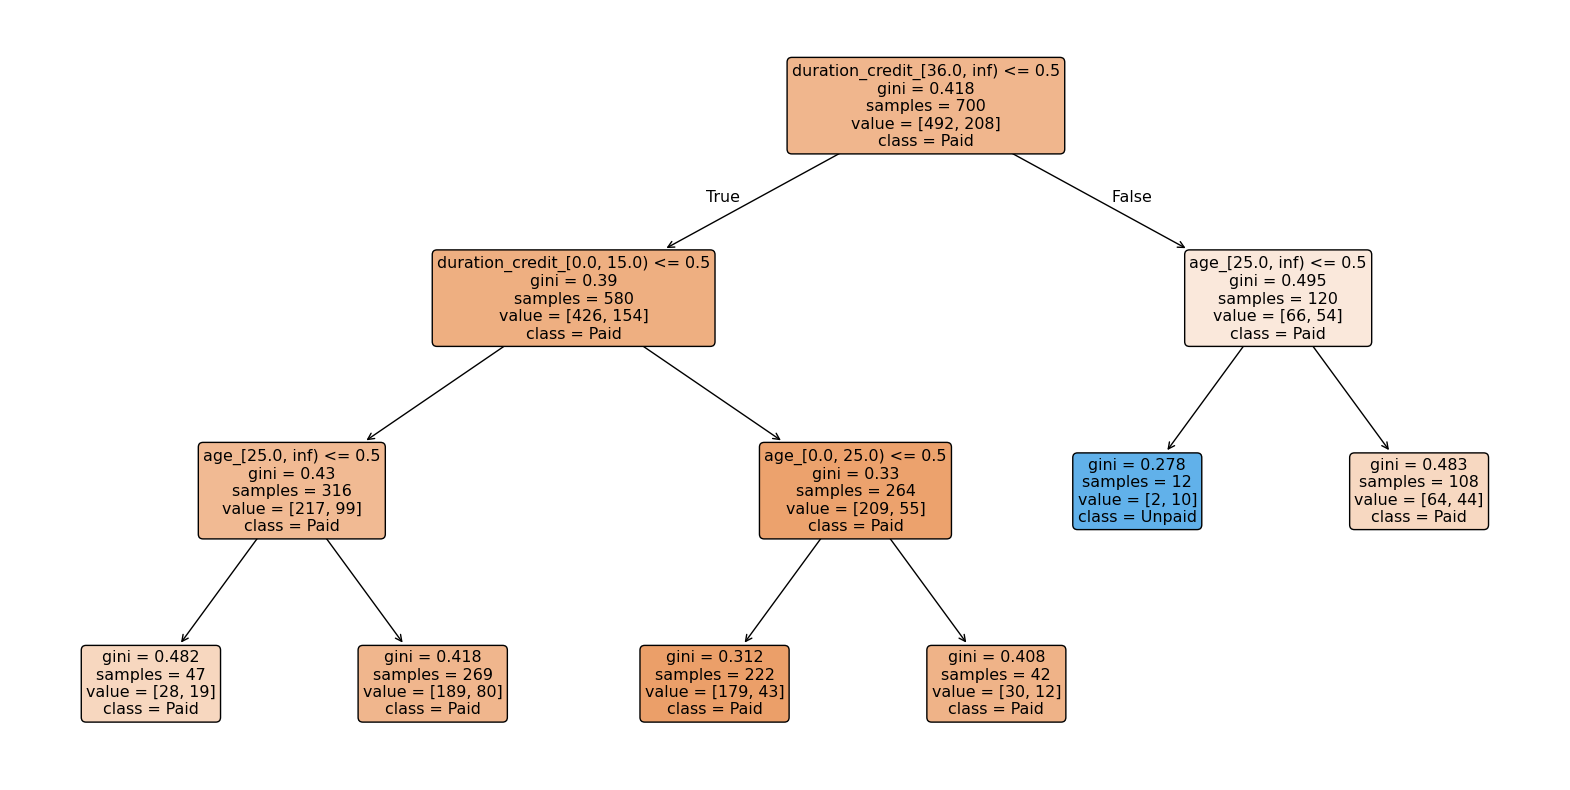

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert categorical interval columns to numerical features
X_train = pd.get_dummies(train[['age', 'duration_credit']].astype(str))
y_train = train['presence_unpaid']

# Create and train the decision tree with explicit parameters
arbre = DecisionTreeClassifier(random_state=42, max_depth=3)
arbre.fit(X_train, y_train)

# To visualize the tree partitions, uncomment:
# from sklearn.tree import plot_tree
# plot_tree(arbre, feature_names=X_train.columns)

plt.figure(figsize=(20,10))
plot_tree(arbre, 
          feature_names=X_train.columns,
          class_names=['Paid', 'Unpaid'],
          filled=True,
          rounded=True)
plt.show()

$$  impureté(noeud~père) - \sum^p_{i=1}\frac{n_i}{n}Gini(i^e ~noeud ~fils) $$

$$  Gini~(noeud)=1-\sum_if^2_i = \sum_{i\neq j}f_i f_j $$ 

$$  Entropie~(noeud) = - \sum_i f_i ~log(f_i) $$

In [4]:
from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier(
    criterion='gini',
    ccp_alpha=0,
    random_state=235
)
cart.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0, random_state=235)

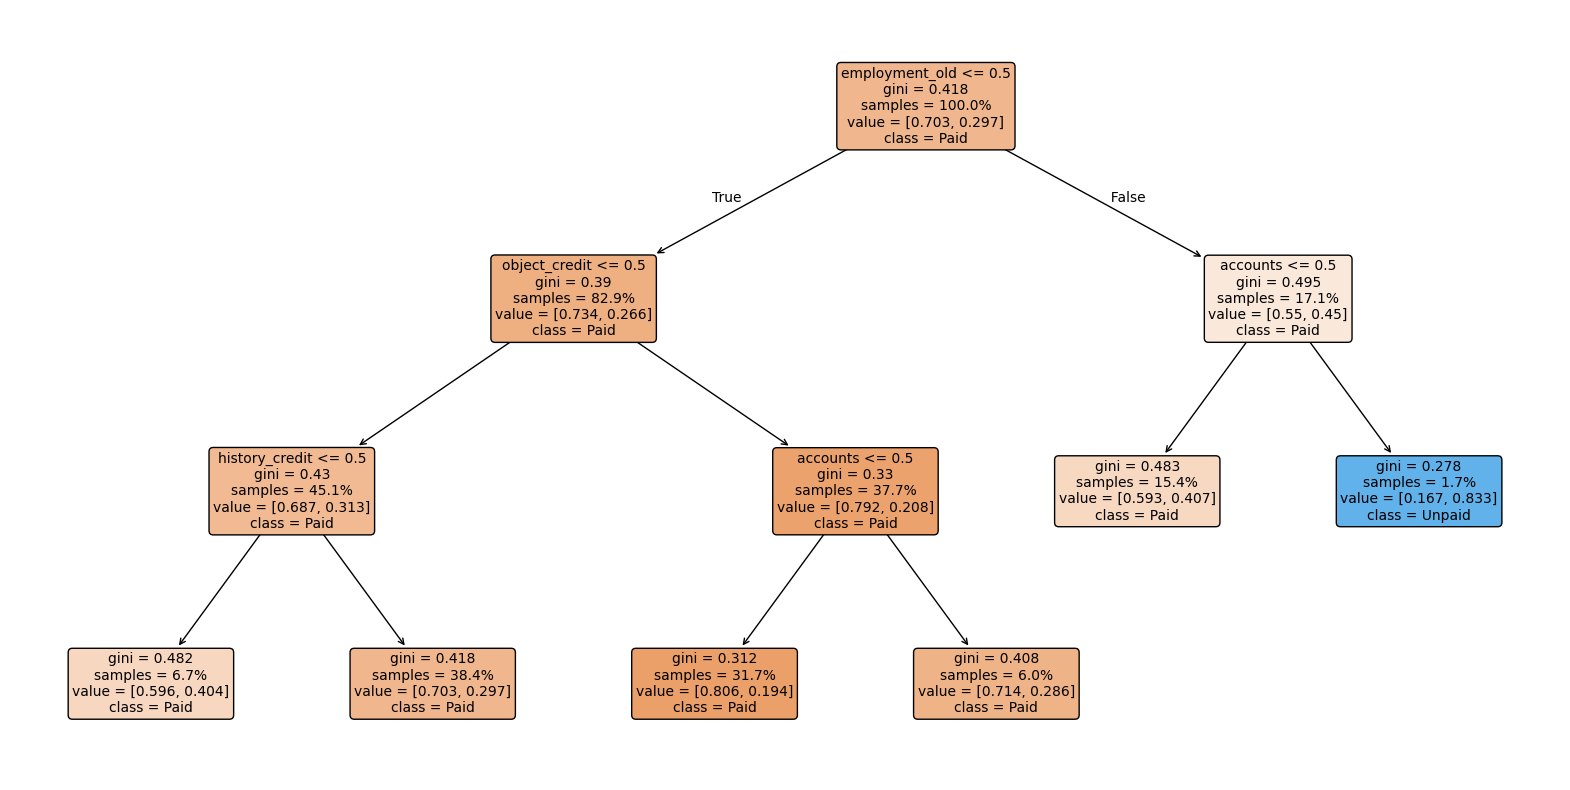

In [4]:
from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier(
    criterion='gini',
    ccp_alpha=0,
    random_state=235
)
cart.fit(X_train, y_train)

varquali = ["accounts",
            "history_credit", "object_credit", "savings",
            "employment_old", "family_status",
            "guarantees", "property",
            "other_credits", "home_status", "job_type",
            "nb_of_dependants", "telephone"]

varquali = credit2.columns[credit2.dtypes == 'object'].tolist()

for col in varquali:
    credit2[col] = credit2[col].astype('category')

varquanti = [
    "duration_credit", "amount_credit", "effort_rate",
    "home_old", "age", "nb_credits"
]    

plt.figure(figsize=(20,10))
plot_tree(cart, 
          feature_names=varquali + varquanti, 
          class_names=['Paid', 'Unpaid'], 
          filled=True, 
          rounded=True, 
          proportion=True, 
          fontsize=10, 
          max_depth=4)
plt.show()

The following variant specifies the qualitative and quantitative variables defined above, as well as the minimum number of people and the maximum depth of the tree.

In [6]:
varquali = ["accounts",
            "history_credit", "object_credit", "savings",
            "employment_old", "family_status",
            "guarantees", "property",
            "other_credits", "home_status", "job_type",
            "nb_of_dependants", "telephone"]

for col in varquali:
    credit2[col] = credit2[col].astype('category')

In [7]:
varquali = credit2.columns[credit2.dtypes == 'object'].tolist()

In [8]:
varquanti = [
    "duration_credit", "amount_credit", "effort_rate",
    "home_old", "age", "nb_credits"
]

In [9]:
# Convert interval strings to numerical values for quantitative variables
for col in varquanti:
    credit2[col] = credit2[col].apply(lambda x: float(x.split(',')[0].strip('[')) if isinstance(x, str) else x)

# Convert qualitative variables to categorical codes
for col in varquali:
    credit2[col] = credit2[col].astype('category').cat.codes

cart = DecisionTreeClassifier(
    criterion='gini',
    min_samples_leaf=30,
    min_samples_split=60,
    max_depth=4
)
cart.fit(credit2[varquali + varquanti], credit2['presence_unpaid'])


DecisionTreeClassifier(max_depth=4, min_samples_leaf=30, min_samples_split=60)

In [13]:
# Affichage plus structuré des paramètres et caractéristiques de l'arbre
print("="*50)
print("Summary du modèle d'arbre de décision")
print("="*50)

# Section des paramètres
print("\nParamètres du modèle:")
params = cart.get_params()
for param, value in params.items():
    print(f"- {param}: {value}")

# Section des importances des variables
print("\nImportance des variables:")
importances = dict(zip(varquali + varquanti, cart.feature_importances_))
# Tri par ordre décroissant d'importance
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)
for var, imp in sorted_importances:
    print(f"- {var}: {imp:.4f}")

# Section des caractéristiques de l'arbre
print("\nCaractéristiques de l'arbre:")
print(f"- Profondeur: {cart.get_depth()}")
print(f"- Nombre de feuilles: {cart.get_n_leaves()}")
print("="*50)

Summary du modèle d'arbre de décision

Paramètres du modèle:
- ccp_alpha: 0.0
- class_weight: None
- criterion: gini
- max_depth: 4
- max_features: None
- max_leaf_nodes: None
- min_impurity_decrease: 0.0
- min_samples_leaf: 30
- min_samples_split: 60
- min_weight_fraction_leaf: 0.0
- monotonic_cst: None
- random_state: None
- splitter: best

Importance des variables:
- effort_rate: 0.1740
- age: 0.0724
- nb_credits: 0.0716
- amount_credit: 0.0320
- home_old: 0.0285
- duration_credit: 0.0000

Caractéristiques de l'arbre:
- Profondeur: 4
- Nombre de feuilles: 10


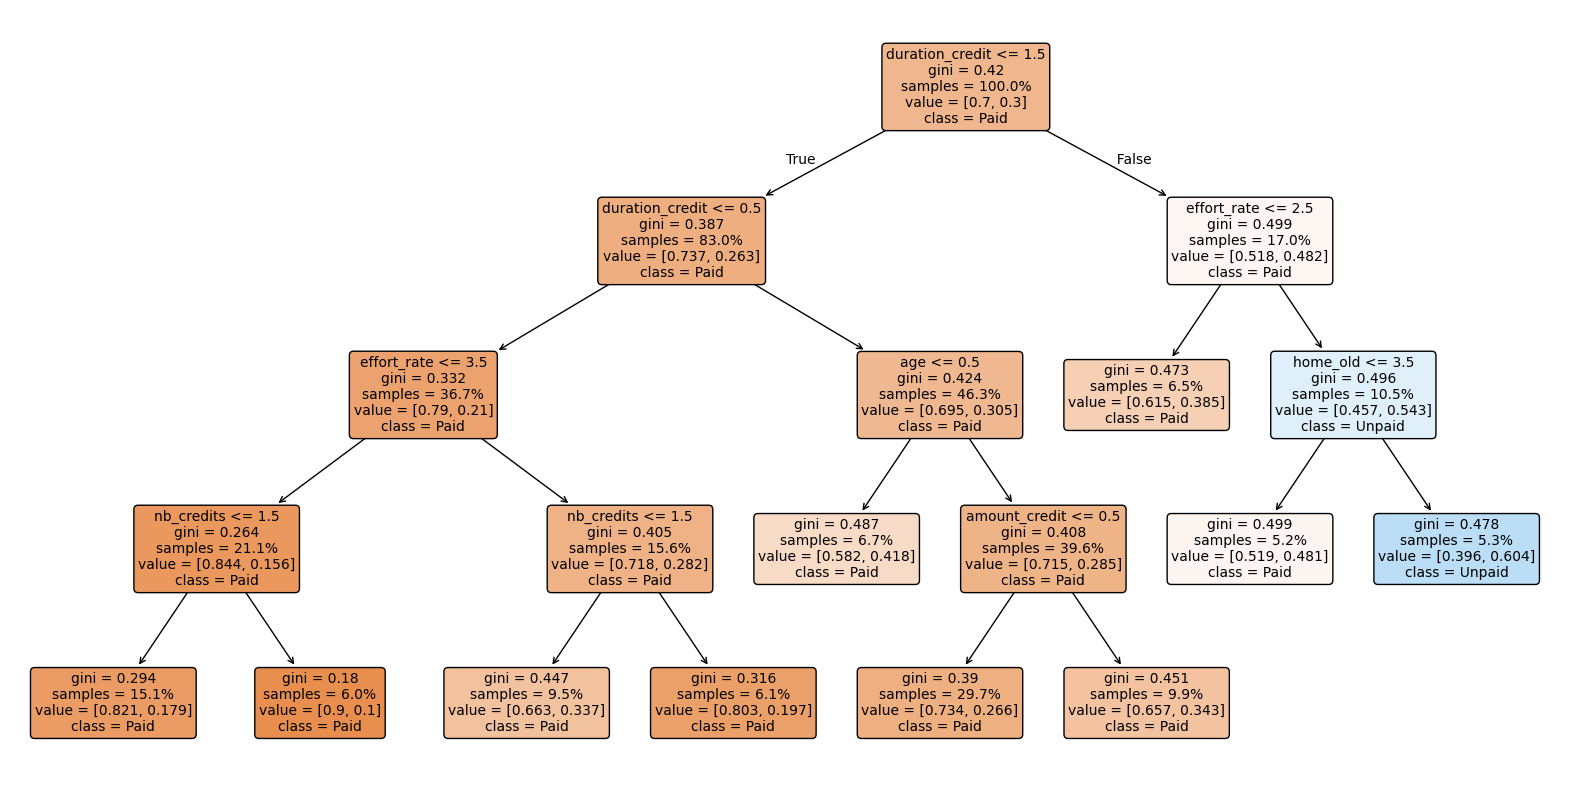

In [14]:
plt.figure(figsize=(20,10))
plot_tree(cart, 
          feature_names=varquali + varquanti, 
          class_names=['Paid', 'Unpaid'], 
          filled=True, 
          rounded=True, 
          proportion=True, 
          fontsize=10, 
          max_depth=4)
plt.show()

### Complexity and spread of a decision tree
The following variant specifies the qualitative and quantitative variables defined above, as well as the minimum number and maximum depth of the tree.

In [15]:
# Affichage de la complexité et de l'étalement de l'arbre de décision
print("="*50)
print("Analyse de la complexité de l'arbre")
print("="*50)
print(f"Profondeur maximale: {cart.get_depth()}")
print(f"Nombre de feuilles: {cart.get_n_leaves()}")
print(f"Nombre total de nœuds: {cart.tree_.node_count}")
print(f"Impureté Gini moyenne: {cart.tree_.impurity.mean():.4f}")
print("="*50)

Analyse de la complexité de l'arbre
Profondeur maximale: 4
Nombre de feuilles: 10
Nombre total de nœuds: 19
Impureté Gini moyenne: 0.4027


The error rates shown are relative, as they have been scaled to be equal to 1 for the tree reduced to the root. However, it is clear that, even reduced to the root, the tree does not have an error rate equal to 1. In reality, this tree without splitting commits a classification error of 191/668 (191 files are with unpaid debts in the learning sample), so each line of the table must be multiplied by 191/668 = 0.28593 to obtain the absolute error.

So, for the maximum tree, the absolute error by cross-validation is :


In [16]:
1.02094 * 191/668

0.29191547904191617

As for the absolute error by resubstitution, it is :

In [17]:
0.51309 * 191/668

0.14670687125748502

This last value can be verified by applying the tree to the training sample (using the predict function, to which we'll return later) and directly calculating the error rate :

In [18]:
# Ensure feature names match those used during training
X_test = credit2.drop(columns=['presence_unpaid'])
# Use the same column names as during model fitting
X_test.columns = [col.replace(' ', '_').lower() for col in X_test.columns]
# Align columns with training data
X_test = X_test[cart.feature_names_in_]
error_rate = sum(cart.predict(X_test) != credit2['presence_unpaid']) / len(credit2)
error_rate

0.289

The standard deviation of the cross-validation error is also displayed, in the xstd column. It is equal to :

$$  \sqrt \frac{xerror \times (1 - xerror)}{taille~échantillon} $$ 

In [19]:
x = 1.02094 * 0.28593
import math
math.sqrt((x*(1-x))/668) / 0.28593

0.06152108491313495

The last value in the xstd column is found.

In [20]:
ccp_alphas, impurities = cart.cost_complexity_pruning_path(X_train, y_train)

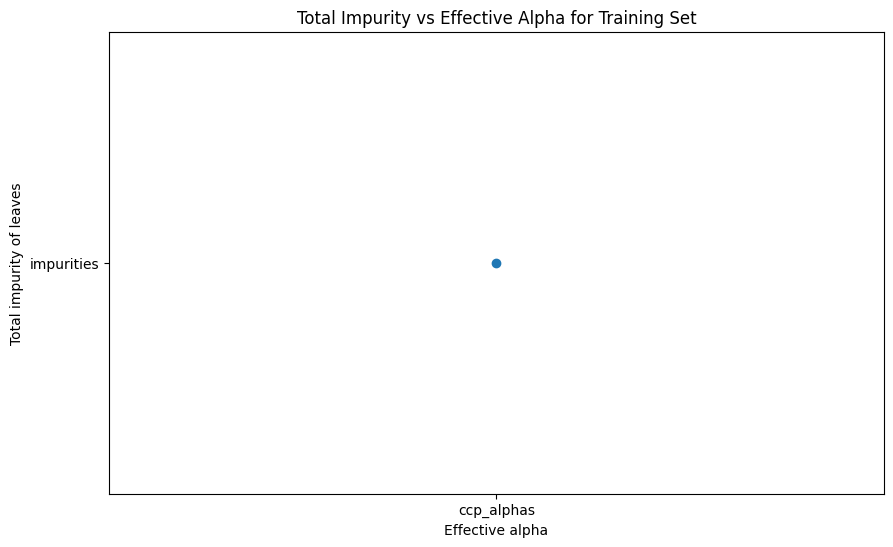

In [21]:
# Extract ccp_alphas and impurities from the tree
ccp_alphas, impurities = cart.cost_complexity_pruning_path(X_train, y_train)

# Create a plot of the cross-validation error vs alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities, 'o-')  # Corrected format string
plt.xlabel("Effective alpha")
plt.ylabel("Total impurity of leaves")
plt.title("Total Impurity vs Effective Alpha for Training Set")
plt.show()

Evolution of cross-validation error and number of leaves as a function of tree complexity parameter.

$$  C_{CP}(arbre) = CR(arbre) + CP.(nombre~feuilles) $$

In [22]:
0.91710 + 0.058701

0.975801

Pruning

In [23]:
prunedcart4f = DecisionTreeClassifier(ccp_alpha=0.0328152).fit(X_train, y_train)

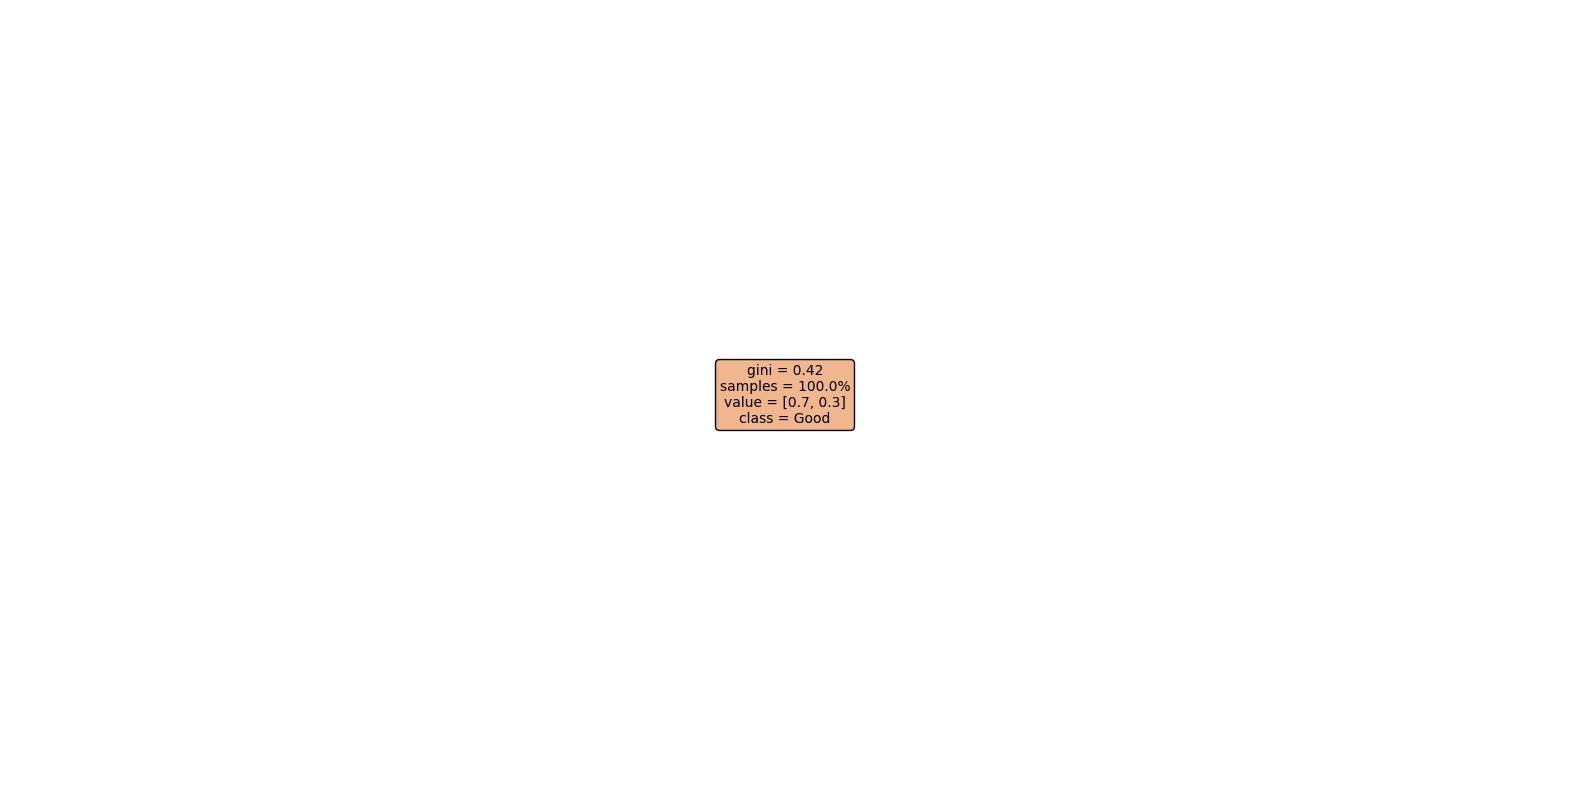

In [24]:
plt.figure(figsize=(20, 10))
plot_tree(prunedcart4f, 
          feature_names=X_train.columns, 
          class_names=['Good', 'Bad'], 
          filled=True, 
          rounded=True, 
          proportion=True, 
          precision=2, 
          fontsize=10, 
          max_depth=None)
plt.show()

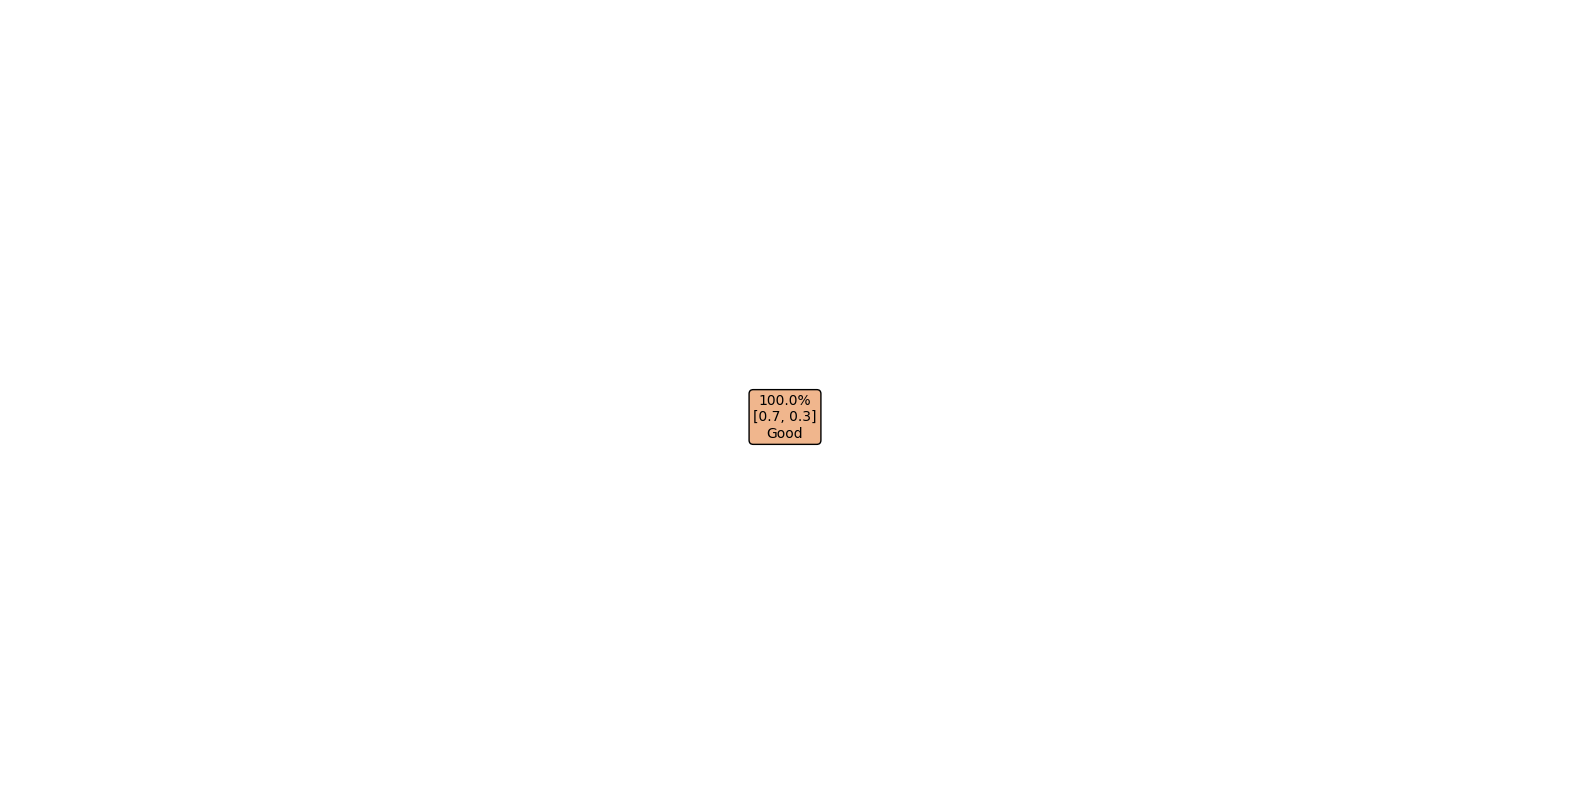

In [25]:
plt.figure(figsize=(20, 10))
plot_tree(prunedcart4f, 
          feature_names=X_train.columns, 
          class_names=['Good', 'Bad'], 
          filled=True, 
          rounded=True, 
          proportion=True, 
          precision=2, 
          fontsize=10, 
          max_depth=None,
          impurity=False,
          node_ids=False,
          label='none')
plt.title(" ")
plt.show()

In [26]:
# This code finds the optimal pruning parameter using scikit-learn's cost complexity pruning
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Get the pruning path and alpha values
path = cart.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Calculate error rates using cross-validation
errors = []
scores_std = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=alpha)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    errors.append(1 - np.mean(scores))
    scores_std.append(np.std(scores))

# Find optimal alpha (best compromise between complexity and accuracy)
min_error_idx = np.argmin(errors)
threshold_error = errors[min_error_idx] + scores_std[min_error_idx]

# Select the largest alpha within one standard deviation of the minimum error
optimal_alpha = ccp_alphas[np.where(errors < threshold_error)[0][-1]]
optimal_alpha

np.float64(0.0013052852581655894)

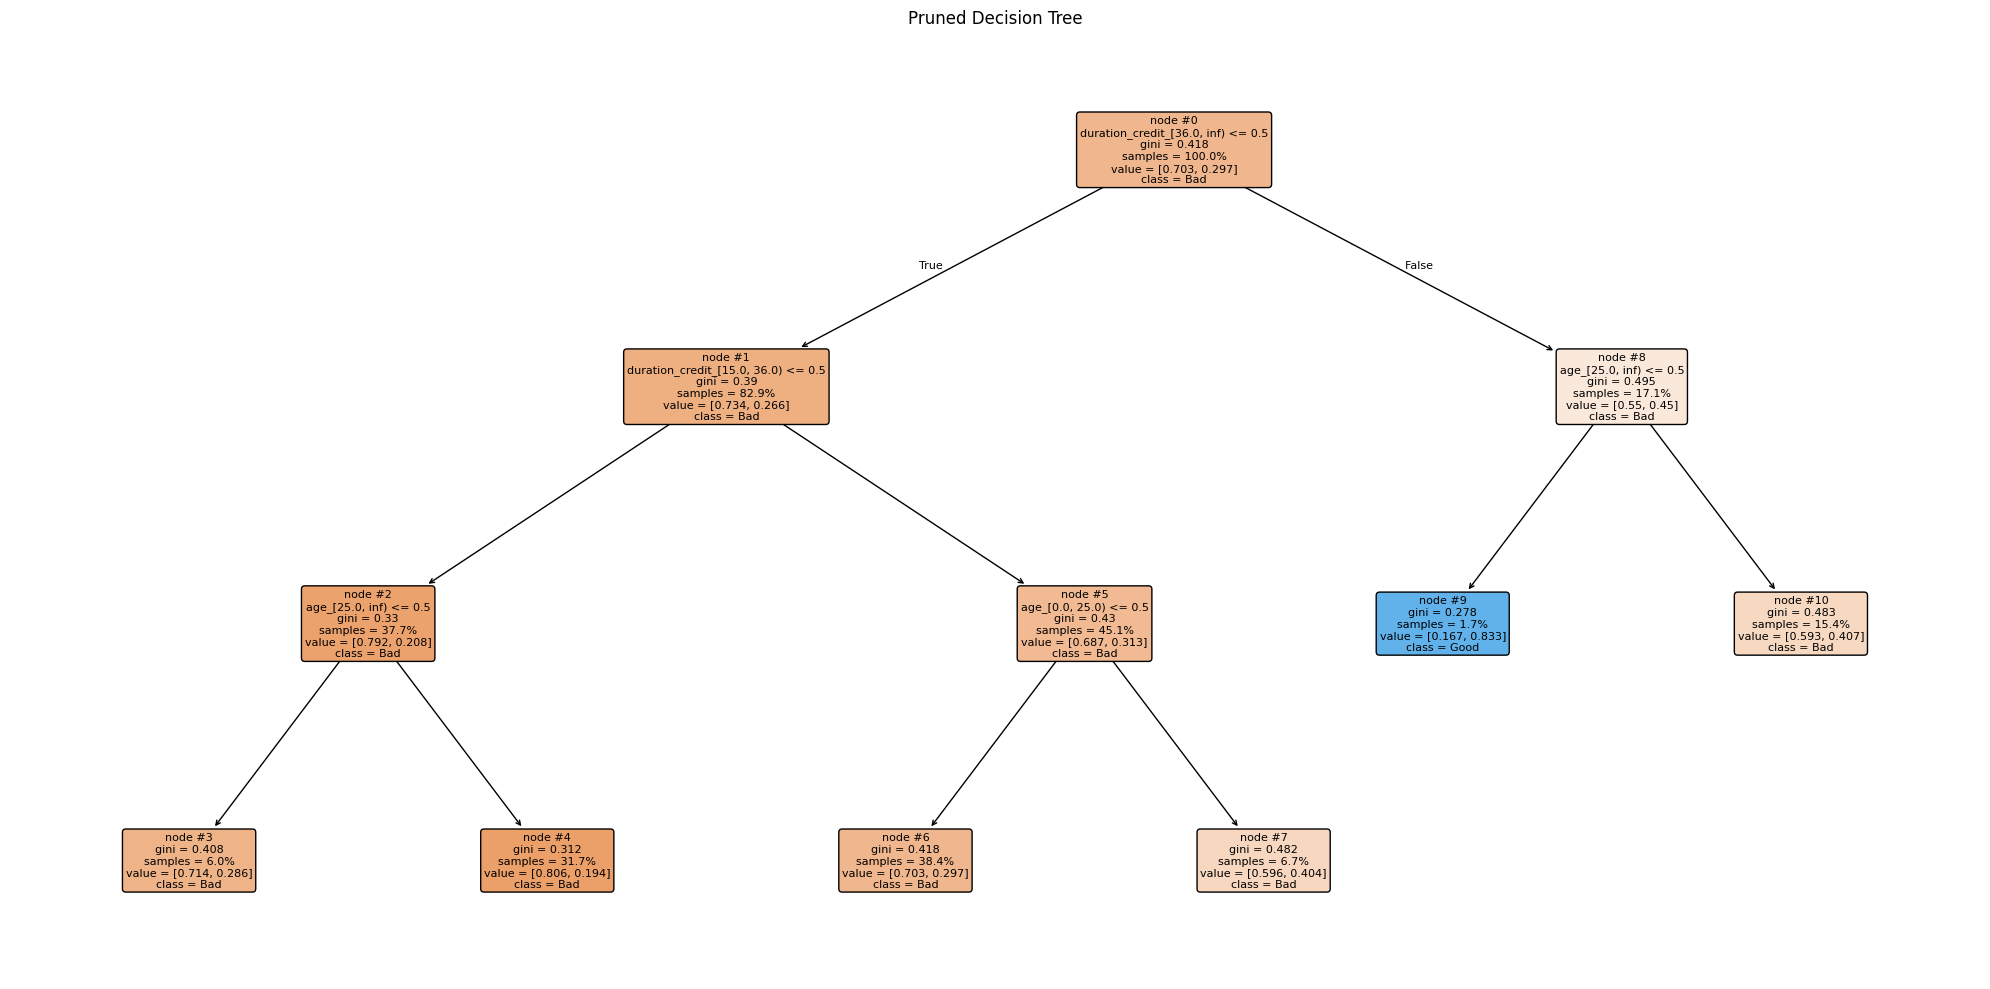

In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

min_cp = ccp_alphas[np.where(np.array(errors) < threshold_error)[0][0]]
pruned_cart = DecisionTreeClassifier(ccp_alpha=min_cp)
pruned_cart.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(pruned_cart, 
          feature_names=X_train.columns, 
          class_names=['Bad', 'Good'], 
          filled=True, 
          rounded=True, 
          proportion=True,
          node_ids=True,
          fontsize=8,
          max_depth=3)
plt.title("Pruned Decision Tree")
plt.tight_layout()
plt.show()


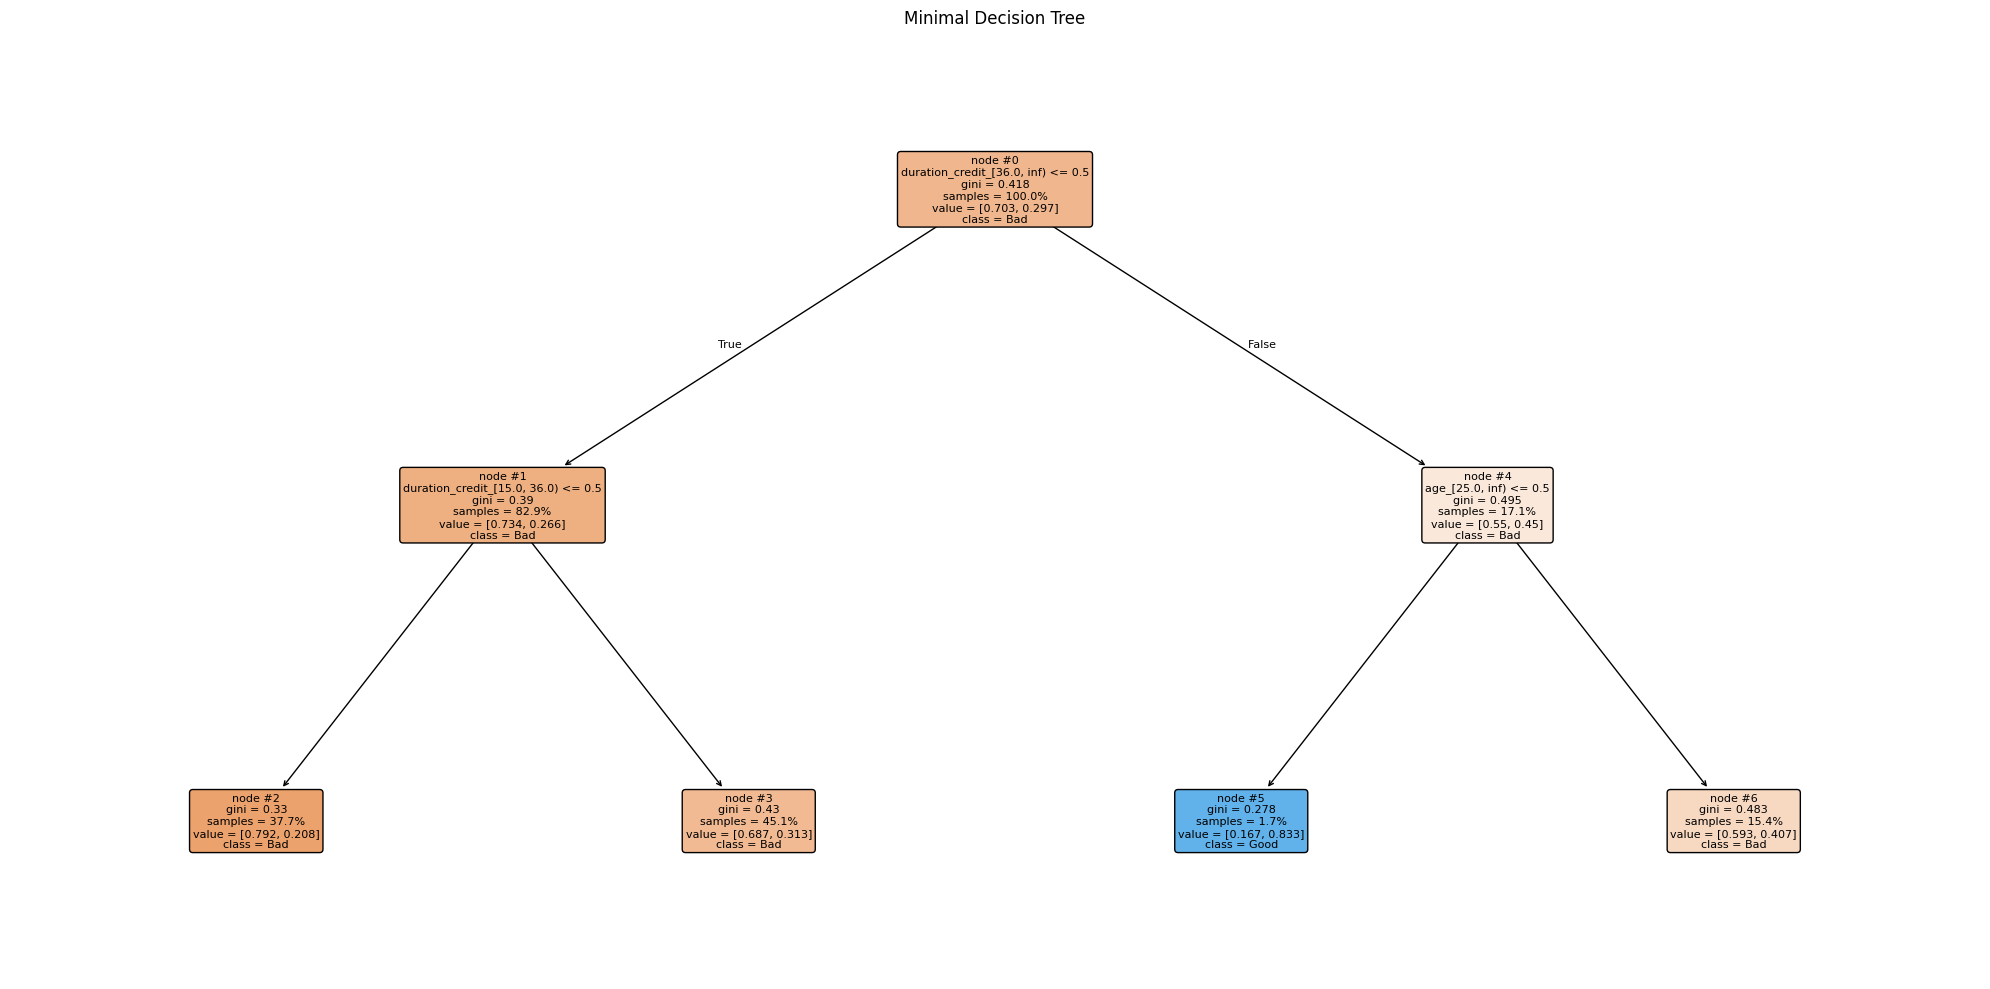

In [29]:
min_cart = DecisionTreeClassifier(ccp_alpha=ccp_alphas[min(2, len(ccp_alphas)-1)])
min_cart.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(min_cart, 
          feature_names=X_train.columns, 
          class_names=['Bad', 'Good'], 
          filled=True, 
          rounded=True, 
          proportion=True,
          node_ids=True,
          fontsize=8,
          max_depth=3)
plt.title("Minimal Decision Tree")
plt.tight_layout()
plt.show()

In [31]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Vérification des variables avant l'entraînement
if 'credit2' not in locals():
    raise ValueError("La variable 'credit2' doit être définie")

# Sélection des features pertinentes
vars = ['accounts', 'history_credit', 'object_credit', 'savings', 'duration_credit', 'amount_credit']

# Vérification des colonnes dans le DataFrame
missing_cols = [col for col in vars + ['presence_unpaid'] if col not in credit2.columns]
if missing_cols:
    raise ValueError(f"Colonnes manquantes dans le DataFrame : {missing_cols}")

# Convertir les variables catégorielles en variables numériques
# On transforme le sous-DataFrame en variables indicatrices
X = pd.get_dummies(credit2[vars], drop_first=False)
y = credit2['presence_unpaid']

# Création du classifieur d'arbre de décision avec des paramètres optimisés
cart = DecisionTreeClassifier(
    criterion='gini',        # Critère de division
    max_depth=3,             # Profondeur maximale de l'arbre
    min_samples_split=20,    # Nombre minimum d'échantillons pour diviser un nœud
    min_samples_leaf=10,     # Nombre minimum d'échantillons dans une feuille
    random_state=42          # Pour la reproductibilité
)

# Entraînement du modèle avec vérification des données
try:
    cart.fit(X, y)
except Exception as e:
    raise ValueError(f"Erreur lors de l'entraînement du modèle : {str(e)}")

# Affichage des informations du modèle entraîné
print("Modèle d'arbre de décision entraîné avec succès :")
print(cart)


Modèle d'arbre de décision entraîné avec succès :
DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=20,
                       random_state=42)


### Prediction and measurement of the discriminating power of a decision tree

In [32]:

X_test = test[varquali + varquanti]  # 'features' étant la liste des colonnes de prédicteurs
y_test = test["presence_unpaid"].values


In [33]:
X_test = pd.get_dummies(test[vars], drop_first=False)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [34]:
# Prédiction des probabilités pour chaque classe sur le DataFrame test
CART4f = prunedcart4f.predict_proba(X_test)

# Afficher les 5 premières lignes
print(CART4f[:5])


[[0.70285714 0.29714286]
 [0.70285714 0.29714286]
 [0.70285714 0.29714286]
 [0.70285714 0.29714286]
 [0.70285714 0.29714286]]


For a classification tree, with the “prob” type, the “predict” function creates an ematrix with one column per modality of the variable to be explained, each column containing the associated probability. Here, for example, are the first 5 values of this matrix in the test sample, with the first obs being the 1st, 5th, 7th, 8th and 13th of the full sample.

In our case, we want to predict the value “1” of the variable to be explained test_dollar_presence_impaye, so we're interested in the second column of the matrix test_dollar_CART4f[,2]". The label.ordering=c(0,1) command indicates that the “1” modality is used to designate positive individuals, and “0” for negative ones.


In [35]:
from sklearn.metrics import roc_auc_score

# Supposons que test['presence_impaye'] contient les vraies étiquettes (0/1)
# et que test['CART4f'] est un tableau NumPy ou un DataFrame contenant les probabilités pour chaque classe.
# On suppose ici que test['CART4f'] est un tableau NumPy de forme (n_samples, 2).
# Nous utilisons la probabilité de la classe 1 (colonne d'indice 1).

auc = roc_auc_score(X_test['presence_unpaid'], X_test['CART4f'][:, 1])
print("AUC:", auc)


KeyError: 'presence_unpaid'

In [36]:
# Cellule 1: Importations et réglages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

#X_test = test[features]  # 'features' étant la liste des colonnes de prédicteurs
y_test = test["presence_unpaid"].values


# Pour la reproductibilité
np.random.seed(235)

# Cellule 2: Supposons que vous avez déjà ajusté un arbre 'cart' sur vos données d'entraînement
# et que vous disposez des ensembles X_train, y_train et X_test, y_test.
# Par exemple, cart a été ajusté ainsi (à adapter selon votre cas) :
# cart = DecisionTreeClassifier(criterion='gini', max_depth=..., min_samples_split=..., min_samples_leaf=..., random_state=42)
# cart.fit(X_train, y_train)
#
# Remarque : Assurez-vous que X_train et X_test ont exactement les mêmes colonnes.
#
# Cellule 3: Calcul du chemin de complexité et création de la table de performance (auc)

# Calculer le chemin de complexité (pruning path) pour l'arbre déjà ajusté 'cart'
pruning_path = cart.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = pruning_path.ccp_alphas  # tableau des valeurs de CP (ccp_alpha)
# Dans R, on boucle à partir de la 2ème ligne de cart$cptable.
# Nous allons donc ignorer la première valeur de ccp_alphas.
auc_records = []

# Parcourir les valeurs de CP en sautant la première
for i, alpha in enumerate(ccp_alphas[1:], start=1):
    # Créer un arbre pruned avec ccp_alpha=alpha en utilisant les mêmes hyperparamètres que 'cart'
    cart_pruned = DecisionTreeClassifier(
        criterion=cart.criterion,
        max_depth=cart.max_depth,
        min_samples_split=cart.min_samples_split,
        min_samples_leaf=cart.min_samples_leaf,
        random_state=42,
        ccp_alpha=alpha
    )
    cart_pruned.fit(X_train, y_train)
    
    # Prédiction des probabilités sur l'ensemble test (probabilité de la classe positive)
    probas = cart_pruned.predict_proba(X_test)[:, 1]
    
    # Calcul de l'AUC
    auc_val = roc_auc_score(y_test, probas)
    
    # Nombre de feuilles : dans scikit-learn, cart_pruned.get_n_leaves() renvoie le nombre de feuilles
    n_leaves = cart_pruned.get_n_leaves()
    
    # L'erreur croisée (xerror) n'est pas directement fournie ; on la mettra à NaN
    xerror = np.nan
    
    auc_records.append({
        "CP": alpha,
        "nfeuilles": n_leaves,  # équivalent à nsplit + 1 en R
        "erreur": xerror,
        "AUC": auc_val
    })

# Convertir la liste en DataFrame et définir les colonnes
auc_df = pd.DataFrame(auc_records, columns=["CP", "nfeuilles", "erreur", "AUC"])
print(auc_df)


         CP  nfeuilles  erreur       AUC
0  0.000854          5     NaN  0.627822
1  0.001305          4     NaN  0.627822
2  0.004527          3     NaN  0.599289
3  0.005598          2     NaN  0.599289
4  0.009668          1     NaN  0.500000


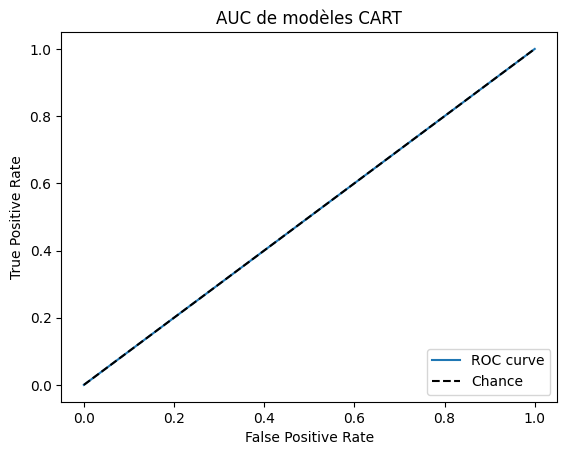

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Supposons que :
# y_true correspond aux vraies étiquettes, par exemple test["presence_impaye"]
# y_score correspond aux probabilités prédites pour la classe positive (ex: CART4f[:, 1])
y_true = test["presence_unpaid"]
y_score = CART4f[:, 1]  # assurez-vous que CART4f est un array numpy

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_true, y_score)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
# Tracer la diagonale de chance
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Chance')
plt.title('AUC de modèles CART')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
